# Analisys of international soccer data
inspiration: https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017/notebooks?datasetId=4305&sortBy=voteCount

https://www.kaggle.com/phjulien/a-journey-through-the-history-of-soccer

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [19]:
print('pandas={}'.format(pd.__version__))
print('numpy={}'.format(np.__version__))
print('seaborn={}'.format(sns.__version__))
print('matplotlib={}'.format(plt.__version__))

pandas=0.25.1
numpy=1.19.5
seaborn=0.11.0
matplotlib=3.1.1


# First, gather the data!

In [2]:
df = pd.read_csv('project_data.csv')
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41846 entries, 0 to 41845
Data columns (total 9 columns):
date          41846 non-null object
home_team     41846 non-null object
away_team     41846 non-null object
home_score    41846 non-null int64
away_score    41846 non-null int64
tournament    41846 non-null object
city          41846 non-null object
country       41846 non-null object
neutral       41846 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


In [4]:
df.describe()

,home_score,away_score
count,41846.000000,41846.000000
mean,1.743703,1.186374
std,1.752224,1.403199
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


look at the max scores... 31 and 21 goals.. this is really an anormal thing! let's give a close look

In [5]:
df[(df.home_score == 31) | (df.away_score == 21)]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
23796,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False
27373,2005-03-11,Guam,North Korea,0,21,EAFF Championship,Taipei,Chinese Taipei,True


researching this games... this really happend!
* https://www.nowuc.com.au/2018/03/the-five-biggest-ever-wins-in-international-soccer/

and australia have two of the 5 biggest wins in international soccer ever... incredible, this are really strange situations... we can understand better this behaviour using a boxplot for this two measures

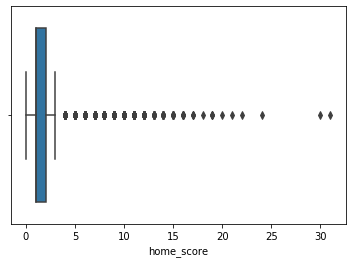

In [6]:
sns.boxplot(x=df.home_score, data=df)

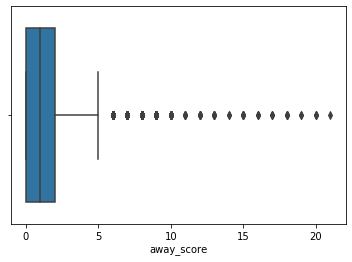

In [7]:
sns.boxplot(x=df.away_score, data=df)

Creating the winner and loose feature on the dataset

In [8]:
def outcome(row):
    result= 'D'
    if row['home_score'] > row['away_score']:
        result = 'H'
    elif row['away_score'] > row['home_score']:
        result = 'A'
    return result

def get_winner(row):
    result= 'Due'
    if row['home_score'] > row['away_score']:
        result = row['home_team']
    elif row['away_score'] > row['home_score']:
        result = row['away_team']
    return result

def get_looser(row):
    result= 'Due'
    if row['home_score'] < row['away_score']:
        result = row['home_team']
    elif row['away_score'] < row['home_score']:
        result = row['away_team']
    return result
        

df['winner_team'] = df.apply(lambda x: get_winner(x) , axis=1)
df['looser_team'] = df.apply(lambda x: get_looser(x) , axis=1)
df['outcome'] = df.apply(lambda x: outcome(x), axis=1)
df['date'] = df['date'].astype('datetime64')
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner_team,looser_team,outcome
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Due,Due,D
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Scotland,H
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,England,H
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Due,Due,D
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,England,H


# teams score more goals in Official or in Friendly games?
What about the distribution of the total goals for every match? there are differences when is a friendly game or is a official game? lets see

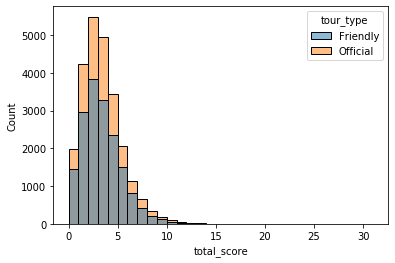

In [9]:
# forst, we can need to calcocate the total goals for every match in the dataset
df['total_score'] = df['home_score'] + df['away_score']
df['tour_type'] = df['tournament'].apply(lambda x: 'Friendly' if x == 'Friendly' else 'Official')
# now, we create the histogram
sns.histplot(df, x=df.total_score, hue='tour_type', binwidth = 1, binrange = (0,31))

in official games, teams score more goals than in friendly games... not really a surprise, but is a myth backed by data :)

But... wait a minute, if in this dataset we have more Official than Friendly Games, this result can be influenced by this!

In [10]:
df.groupby('tour_type').tour_type.value_counts()

tour_type  tour_type
Friendly   Friendly     17127
Official   Official     24719
Name: tour_type, dtype: int64

currently we have almost 7000 official games more than friendkly games... so, the "count" in the last histogram doesn't give us a precise conclution...

let's try using a freq histrogram ! this will  give us a better look at this measurement

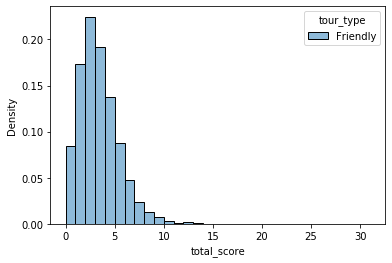

In [11]:
df_friendly = df[df.tour_type == 'Friendly']
sns.histplot(df_friendly, x="total_score", hue='tour_type', binwidth = 1, stat='density', binrange = (0,31))

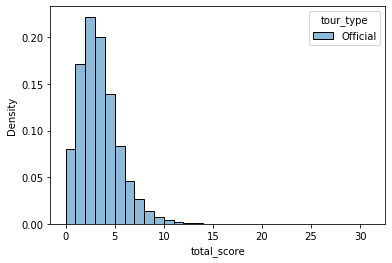

In [12]:
df_official = df[df.tour_type == 'Official']
sns.histplot(df_official, x="total_score", hue='tour_type', binwidth = 1,  stat='density', binrange = (0,31))

with this point of view, teams score almost the same goals, so the tournament type its not a good estimator of the total goals of the game 

# is the place (away /home) a good preditor of outcome?


/Users/prueba/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/prueba/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


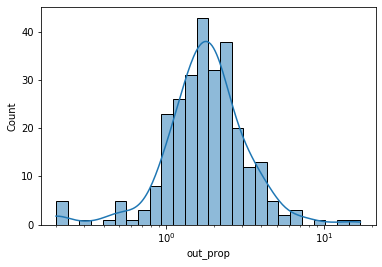

In [13]:
#first, pick the home teams who win the game
df_home_win = df[df.home_team == df.winner_team]
df_home_win['game_place'] = 'H'
df_home_win= df_home_win.groupby(['home_team','game_place']).size()
df_home_win = pd.Series.to_frame(df_home_win, name='size')
df_home_win.reset_index(inplace=True)
df_home_win.rename(columns={"home_team": "team"}, inplace = True)
#df_home_win.head()

# same process to get the away teams who win the game
df_away_win = df[df.away_team == df.winner_team]
df_away_win['game_place'] = 'A'
df_away_win= df_away_win.groupby(['away_team','game_place']).size()
df_away_win = pd.Series.to_frame(df_away_win, name='size')
df_away_win.reset_index(inplace=True)
df_away_win.rename(columns={"away_team": "team"}, inplace = True)
#df_away_win.head()

#append the data into one new dataframe
df_winners = df_home_win.append(df_away_win, ignore_index=True)
#picote the data using game_place
df_winners= df_winners.pivot(index='team', columns='game_place', values='size')
df_winners.reset_index(inplace=True)

#now we can calculate the proportion of home wins / away wins
# if the result is great than 1, there is a correlation between the place and the outcome of the game
# we plot the result in an histogram tho analyse all teams together
df_winners['out_prop'] = df_winners['H'] /  df_winners['A']
df_winners = df_winners.round(1)
#using log scale to analyze better
sns.histplot(data = df_winners, x='out_prop', kde=True, log_scale=True)


the vast majority of the teams has better performance when they play in his country! Why? incluence of the crouds? this is one of the greats myths in football backed in data :) 

# wich are the most "winner" teams of history?

for answer this question we need to obtain the percentage for win games for every team, beacause we have teams that we encounter at the start of time (of this dataset) and some other teams that start record this games in the last years!

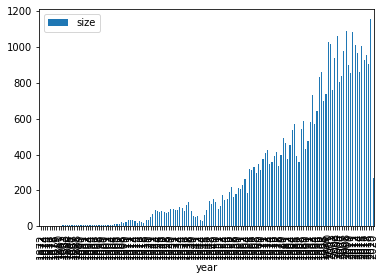

In [14]:
df['year'] = df['date'].dt.year
df_year = df.groupby('year').size()
df_year = pd.Series.to_frame(df_year, name='size')
df_year.reset_index(inplace=True)
df_year.plot(kind='bar', x='year', y='size')

In [15]:
df_home = df[['home_team', 'outcome']]
df_away = df[['away_team', 'outcome']]

df_home['wins'] = df_home.outcome.apply(lambda x: 1 if x=='H' else 0)
df_away['wins'] = df_home.outcome.apply(lambda x: 1 if x=='A' else 0)

df_home.rename(columns = {'home_team':'Team'}, inplace = True)
df_away.rename(columns = {'away_team':'Team'}, inplace = True)

df_winnerp = df_home.append(df_away, ignore_index=True)
df_winnerp = df_winnerp.groupby('Team').agg(wins_qty=('wins', 'sum'), total_qty=('wins', 'count'))
df_winnerp['win%'] = df_winnerp['wins_qty'] / df_winnerp['total_qty']
df_winnerp.sort_values('win%', ascending= 0, inplace=True)
df_winnerp.head(25)

/Users/prueba/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/prueba/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/prueba/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http:

,wins_qty,total_qty,win%
Team,,,
Asturias,1,1,1.000000
Surrey,1,1,1.000000
Canary Islands,3,4,0.750000
Yorkshire,5,7,0.714286
Padania,29,43,0.674419
Jersey,55,82,0.670732
Parishes of Jersey,2,3,0.666667
County of Nice,6,9,0.666667
Basque Country,37,57,0.649123


we have some teams with litle games played... we need to filter this teams! the describe() fucntions will help us to select a "total_qty" value for our filter

In [16]:
df_winnerp.describe()

,wins_qty,total_qty,win%
count,313.000000,313.000000,313.000000
mean,102.862620,267.386581,0.335047
std,122.854368,259.986798,0.158829
min,0.000000,1.000000,0.000000
25%,8.000000,34.000000,0.232323
50%,51.000000,202.000000,0.345609
75%,155.000000,450.000000,0.432836
max,625.000000,1026.000000,1.000000


for simplicity, we use the 50% of total_qty for filter, and plot a barplot with the results

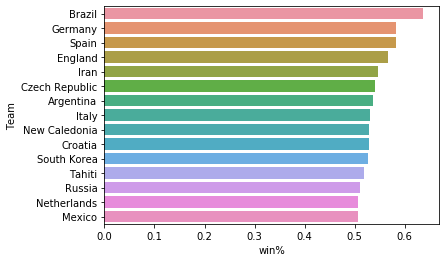

In [17]:
df_winnerp = df_winnerp[(df_winnerp.total_qty >= 202)]
df_winnerp_25 = df_winnerp.head(15)
sns.barplot(x='win%', y=df_winnerp_25.index, data=df_winnerp_25)

i think we can use this results for every lotery game about soccer, like "polla gol" in my country, Chile :). From this analysis we can go further, and study the evolution by yer of the win% measure, or study the different tournaments with this measurement! this analysis go beyond the scope of this notebook, but i enecourage you to, at least, try it for yourself and post your  results in the comments below :)

hope you well !